In [25]:
from neural_priors.utils.data import Subject

In [37]:
subject = '06'
bids_folder = '/data/ds-neuralpriors'
session = 1

subject = Subject(subject, bids_folder=bids_folder)

d = subject.get_behavioral_data(session=session, tasks=['estimation_task'], raw=True, add_info=False).droplevel([0, 1])
onset0 = d.groupby('run').apply(lambda x: x.xs('trigger_2', 0, 'event_type')['onset'])

In [38]:
d['trial_nr'] = (d.index.get_level_values('run') - 1) * 30 + d['trial_nr']
d = d.set_index('trial_nr', append=True).droplevel(1) 
d['onset'] -= onset0.loc[d.index.get_level_values('run')].values

stimulus = d.xs('stimulus', 0, 'event_type')[['onset', 'n']]
stimulus['trial_type'] = 'stimulus'

response = d.xs('response', 0, 'event_type')[['onset']].join(d.xs('feedback', 0, 'event_type')['response'])
response['trial_type'] = 'response'
response = response.groupby('run', group_keys=False).apply(lambda x: x.iloc[:30])

In [39]:
stimulus

onset     n trial_type
run trial_nr                             
1   1           7.523676  34.0   stimulus
    2          17.232706  37.0   stimulus
    3          25.957435  10.0   stimulus
    4          35.683073  23.0   stimulus
    5          44.407851  19.0   stimulus
...                  ...   ...        ...
8   236       248.630575  19.0   stimulus
    237       259.357265  22.0   stimulus
    238       269.082910  12.0   stimulus
    239       277.807662  15.0   stimulus
    240       288.534307  12.0   stimulus

[240 rows x 3 columns]

In [27]:
d.xs('pulse', 0, -1).groupby('run').size()

run
1    137
2    137
3    137
4    137
5    137
6    132
7    137
8    137
dtype: int64

In [30]:
72 - 64

8

In [29]:
d.iloc[:15]

trial_nr      onset  phase  response  nr_frames     n  \
run    event_type                                                           
1   0  instruction         0   0.075446      0       NaN       27.0   NaN   
    1  instruction         0   0.513010      1       NaN      805.0   NaN   
    2  instruction         0  13.942129      0       NaN       30.0   NaN   
    3  instruction         0  14.442598      1       NaN      160.0   NaN   
    4  trigger_1           0  17.111731      0       NaN     2859.0   NaN   
    5  pulse               0  64.789522      0       5.0        NaN   NaN   
    6  trigger_2           0  64.805936      1       NaN      138.0   NaN   
    7  pulse               0  67.091687      1       5.0        NaN   NaN   
    8  trigger_3           0  67.108081      2       NaN      138.0   NaN   
    9  pulse               0  69.393860      2       5.0        NaN   NaN   
    10 trigger_4           0  69.410246      3       NaN      138.0   NaN   
    11 pulse               0  71.695912      3       5.0        NaN   NaN   
    12 fixation1           1  71.712369      0       NaN       19.0  34.0   
    13 fixation2           1  72.029302      1       NaN       18.0  34.0   
    14 stimulus            1  72.329612      2       NaN       35.0  34.0   

                    jitter  start_marker_position  response_time  onset_abs  \
run    event_type                                                             
1   0  instruction     NaN                    NaN            NaN   4.310856   
    1  instruction     NaN                    NaN            NaN   4.748420   
    2  instruction     NaN                    NaN            NaN  18.177539   
    3  instruction     NaN                    NaN            NaN  18.678008   
    4  trigger_1       NaN                    NaN            NaN  21.347141   
    5  pulse           NaN                    NaN            NaN  69.024932   
    6  trigger_2       NaN                    NaN            NaN  69.041346   
    7  pulse           NaN                    NaN            NaN  71.327097   
    8  trigger_3       NaN                    NaN            NaN  71.343491   
    9  pulse           NaN                    NaN            NaN  73.629270   
    10 trigger_4       NaN                    NaN            NaN  73.645656   
    11 pulse           NaN                    NaN            NaN  75.931322   
    12 fixation1       5.0                   13.0            NaN  75.947779   
    13 fixation2       5.0                   13.0            NaN  76.264712   
    14 stimulus        5.0                   13.0            NaN  76.565022   

                     duration range  
run    event_type                    
1   0  instruction   0.437564  wide  
    1  instruction  13.429119  wide  
    2  instruction   0.500469  wide  
    3  instruction   2.669133  wide  
    4  trigger_1    47.694205  wide  
    5  pulse              NaN  wide  
    6  trigger_2     2.302145  wide  
    7  pulse              NaN  wide  
    8  trigger_3     2.302165  wide  
    9  pulse              NaN  wide  
    10 trigger_4     2.302123  wide  
    11 pulse              NaN  wide  
    12 fixation1     0.316933  wide  
    13 fixation2     0.300310  wide  
    14 stimulus      0.583837  wide

<Axes: >

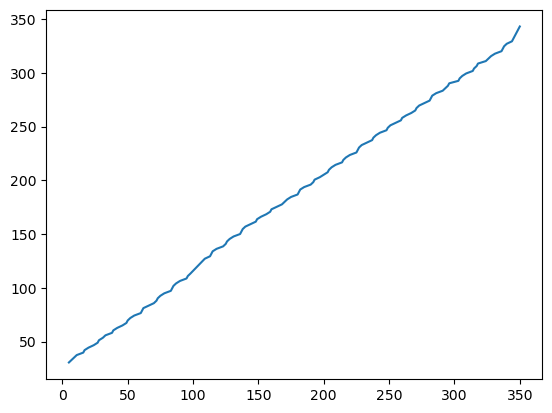

In [18]:
d.loc[6].xs('pulse', 0, -1)['onset'].plot()

<Axes: >

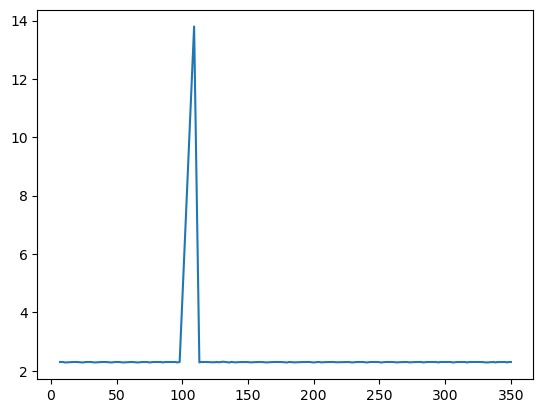

In [23]:
d.loc[6].xs('pulse', 0, -1)['onset'].diff().plot()

In [24]:
d.loc[6].

,,trial_nr,onset,phase,response,nr_frames,n,jitter,start_marker_position,response_time,onset_abs,duration,range
,event_type,,,,,,,,,,,,
0,instruction,0,0.075249,0,NaN,26.0,NaN,NaN,NaN,NaN,3.720662,0.426232,narrow
1,instruction,0,0.501481,1,NaN,276.0,NaN,NaN,NaN,NaN,4.146894,4.604295,narrow
2,instruction,0,5.105776,0,NaN,30.0,NaN,NaN,NaN,NaN,8.751189,0.500479,narrow
3,instruction,0,5.606255,1,NaN,39.0,NaN,NaN,NaN,NaN,9.251668,0.650576,narrow
4,trigger_1,0,6.256831,0,NaN,1457.0,NaN,NaN,NaN,NaN,9.902244,24.305893,narrow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,pulse,0,333.894175,0,5.0,NaN,NaN,NaN,NaN,NaN,337.539588,NaN,narrow
347,pulse,0,336.179751,0,5.0,NaN,NaN,NaN,NaN,NaN,339.825164,NaN,narrow
348,pulse,0,338.481803,0,5.0,NaN,NaN,NaN,NaN,NaN,342.127216,NaN,narrow


In [9]:
subject.get_behavioral_data(session=session, tasks=['estimation_task'], raw=True, add_info=False)

trial_nr       onset  phase  \
subject task            run     event_type                                 
06      estimation_task 1   0   instruction         0    0.075446      0   
                            1   instruction         0    0.513010      1   
                            2   instruction         0   13.942129      0   
                            3   instruction         0   14.442598      1   
                            4   trigger_1           0   17.111731      0   
...                                               ...         ...    ...   
                        8   351 pulse               0  327.715508      0   
                            352 pulse               0  330.017781      0   
                            353 pulse               0  332.319776      0   
                            354 pulse               0  334.621937      0   
                            355 pulse               0  336.907334      0   

                                             response  nr_frames   n  jitter  \
subject task            run     event_type                                     
06      estimation_task 1   0   instruction       NaN       27.0 NaN     NaN   
                            1   instruction       NaN      805.0 NaN     NaN   
                            2   instruction       NaN       30.0 NaN     NaN   
                            3   instruction       NaN      160.0 NaN     NaN   
                            4   trigger_1         NaN     2859.0 NaN     NaN   
...                                               ...        ...  ..     ...   
                        8   351 pulse             5.0        NaN NaN     NaN   
                            352 pulse             5.0        NaN NaN     NaN   
                            353 pulse             5.0        NaN NaN     NaN   
                            354 pulse             5.0        NaN NaN     NaN   
                            355 pulse             5.0        NaN NaN     NaN   

                                             start_marker_position  \
subject task            run     event_type                           
06      estimation_task 1   0   instruction                    NaN   
                            1   instruction                    NaN   
                            2   instruction                    NaN   
                            3   instruction                    NaN   
                            4   trigger_1                      NaN   
...                                                            ...   
                        8   351 pulse                          NaN   
                            352 pulse                          NaN   
                            353 pulse                          NaN   
                            354 pulse                          NaN   
                            355 pulse                          NaN   

                                             response_time   onset_abs  \
subject task            run     event_type                               
06      estimation_task 1   0   instruction            NaN    4.310856   
                            1   instruction            NaN    4.748420   
                            2   instruction            NaN   18.177539   
                            3   instruction            NaN   18.678008   
                            4   trigger_1              NaN   21.347141   
...                                                    ...         ...   
                        8   351 pulse                  NaN  332.619635   
                            352 pulse                  NaN  334.921909   
                            353 pulse                  NaN  337.223903   
                            354 pulse                  NaN  339.526064   
                            355 pulse                  NaN  341.811462   

                                              duration   range  
subject task            run     event_type                      
06      est

In [6]:
d.xs('response', 0, -1)

trial_nr       onset  phase  response  nr_frames     n  jitter  \
run                                                                       
1   18          1   77.918113      4       NaN      300.0  34.0     5.0   
    29          2   86.642899      4       NaN      240.0  37.0     4.0   
    40          3   96.368631      4       NaN      300.0  10.0     5.0   
    51          4  105.093375      4       NaN      240.0  23.0     4.0   
    62          5  114.819071      4       NaN      300.0  19.0     5.0   
...           ...         ...    ...       ...        ...   ...     ...   
8   299        26  279.637426      4       NaN      360.0  19.0     6.0   
    310        27  289.363074      4       NaN      300.0  22.0     5.0   
    321        28  298.087857      4       NaN      240.0  12.0     4.0   
    332        29  308.814449      4       NaN      360.0  15.0     6.0   
    344        30  319.524383      4       NaN      359.0  12.0     6.0   

         start_marker_position  response_time   onset_abs  duration   range  
run                                                                          
1   18                    13.0            NaN   82.153523       NaN    wide  
    29                    15.0            NaN   90.878309       NaN    wide  
    40                    15.0            NaN  100.604041       NaN    wide  
    51                    19.0            NaN  109.328785       NaN    wide  
    62                    23.0            NaN  119.054481       NaN    wide  
...                        ...            ...         ...       ...     ...  
8   299                   25.0            NaN  284.541554       NaN  narrow  
    310                   18.0            NaN  294.267201       NaN  narrow  
    321                   24.0            NaN  302.991985       NaN  narrow  
    332                   17.0            NaN  313.718576       NaN  narrow  
    344                   15.0            NaN  324.428510       NaN  narrow  

[240 rows x 12 columns]